Programa para el análisis de datos y representaciones de la práctica de propiedades térmicas del máster de materiales de la us del curo 23/24

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import re

$\Huge{Práctica\ 1:\ -\ Ciclos\ con\ T}$

In [27]:
#   Credit to chatgpt for this function to find files

def load_files_with_pattern(directory, T_file):
    # Compile the regex pattern to match files starting with 'C' followed by a number
    pattern = re.compile(r'^C\d+')
    T_table = pd.read_csv(T_file, header = None)
    T_dict = dict(zip(T_table[1], T_table[0]))
    # Initialize an empty dictionary to store the dataframes
    dataframes = {}

    # Iterate over all files in the specified directory
    for filename in os.listdir(directory):
        # Check if the filename matches the pattern
        if pattern.match(filename):
            # Construct the full file path
            filepath = os.path.join(directory, filename)
            try:
                # Attempt to read the file into a pandas dataframe
                df = pd.read_csv(filepath, header = None)
                temp = T_dict.get(filename, None)
                # Store the dataframe in the dictionary
                dataframes[filename] = (temp, df)
            except Exception as e:
                print(f"Error reading {filename}: {e}")

    return dataframes

In [28]:
#   Find and load all related files: file_name structure: C#.DAT
direc = 'datos_practicas_23_24'
dtfs = load_files_with_pattern(direc, 'temps_ej1.csv')

Tarea 1: Para el ciclo C1.dat, C6.dat y C12.dat, analizad la señal del campo eléctrico frente al tiempo y de la polarización frente al tiempo, discutiendo cómo se relaciona con el carácter ferroeléctrico o paraeléctrico de la muestra.

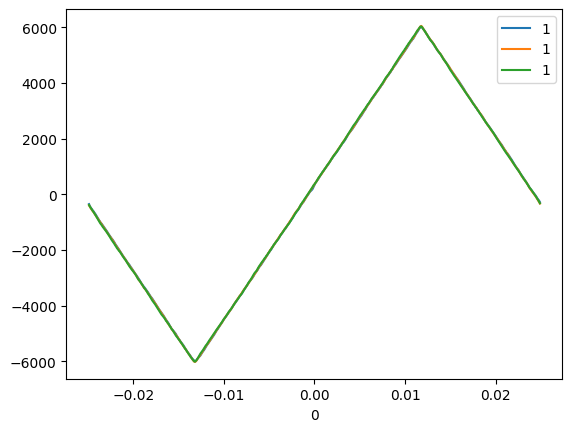

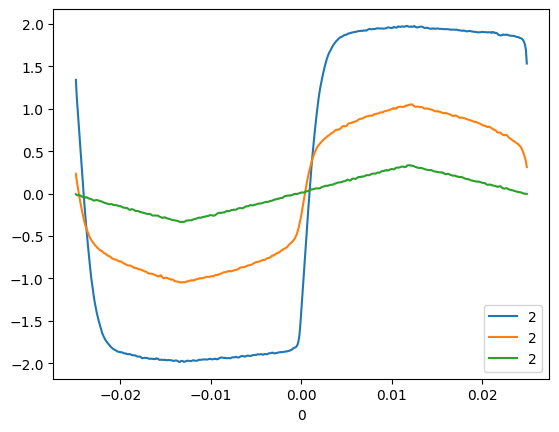

In [37]:
list_of_cicles = ['C1.DAT', 'C6.DAT', 'C12.DAT']
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
for i in list_of_cicles:
    dtfs[i][1].plot(x = 0, y = 1, ax=ax)
    dtfs[i][1].plot(x = 0, y = 2, ax=ax2)
  #  print(dtfs[i][1])

$\Huge{Practica\ 3:\ Coeficiente\ piro}$

In [77]:
def pandas_integrate (x, y):
    int = 0
    int_graph = []
    for i in range (len(x)-1):
        dx = x.loc[i+1]-x.loc[i]
        dy = (y.loc[i+1]+y.loc[i]) / 2
        int += dx * dy
        int_graph.append(dx * dy)
    return int, int_graph

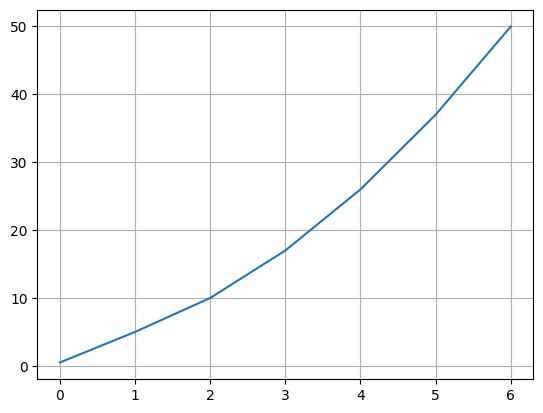

In [84]:
from scipy.integrate import cumtrapz

df = pd.DataFrame(([0, 0], [1, 1], [2, 4], [3, 6], [4, 8], [5, 10], [6, 12], [7, 14]))
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
P = cumtrapz(df[0], df[1])
ax2.plot(df[0].loc[:len(P)-1], P)
plt.grid()

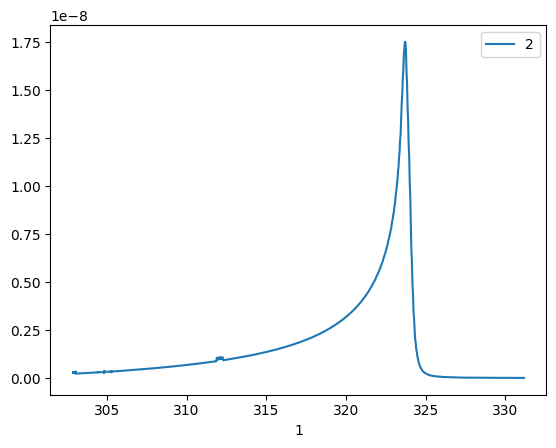

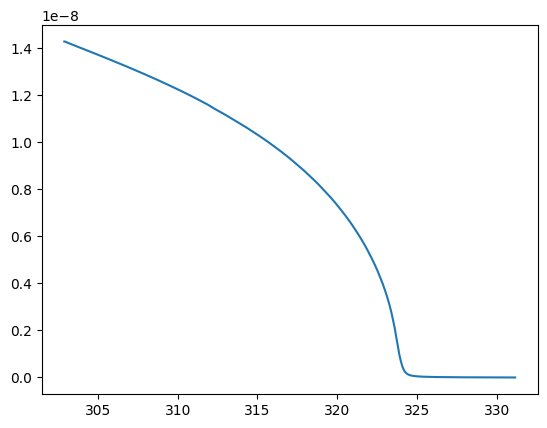

In [111]:
#   Load Data

from scipy.integrate import cumtrapz

S = 64

data = pd.read_csv('datos_practicas_23_24/piro_tgs.dat', header=None)
pi = data[2] / (data[3] * S)
data.plot(x = 1, y = 2)
fig2 = plt.figure()
ax2 = fig2.add_subplot(1,1,1)
P = cumtrapz(pi, data[1])
ax2.plot(data[1].loc[:len(P)-1], P)